In [1]:
pwd

'C:\\Python Files\\AluminaConcEstimator\\NoteBooks'

In [2]:
import sys
sys.path.append('../')

In [3]:
# Do imports first using selected modules only
import Model as Mod
import numpy as np
import ObservationSimulation as ObSim
import matplotlib.pyplot as plt

In [4]:
# define ranges of interest for dissolved and undissolved alumina
cdmax = 8    # maximum alumina content of 8%
cdmin = 2    # minimum alumina content of 2%
cunmax = 6   # maximum undisolved alumina content of 6%
cunmin = 0   # minimum undisolved alumina content of 0%

In [5]:
# only going to do a single timestep, so make it decent one
dt = 10
# examine the increments on 60 increments
ninc = 60

In [6]:
# define the model equations for the single timestep
(F, G, H, B) = Mod.StateEquations(dt)

In [7]:
# initial vectors - note the intention is to study x so
# we will use a fixed/constant u
x0 = np.array([[3.5], [0.5], [2.9193]])
u0 = np.array([[126000], [0.0], [0.0]])

In [9]:
# initialise u array to receive a copy of the constant u0
dims = np.shape(u0)
udim = dims[0]
uconst = np.zeros((ninc+1, udim, 1))
uconst[0] = u0

In [10]:
# Initialise x arrays to explore the x1 and x2 characteristics
dims = np.shape(x0)
xdim = dims[0]
# independent flex over x1 for default x2 and vice versa
x1low = np.copy(x0)
x1low[0] = cdmin        #note this means that the undissolved will retain the x0[1] value above
x2low = np.copy(x0)
x2low[1] = cunmin       #note this means that the dissolved will retain the x0[0] value above

In [11]:
x1low

array([[2.    ],
       [0.5   ],
       [2.9193]])

In [12]:
x2low

array([[3.5   ],
       [0.    ],
       [2.9193]])

In [13]:
# create two arrays for x1 spanning dissolved range, the second array will have the result of single timestep
x1 = np.zeros((ninc+1, xdim, 1))
x1dt = np.zeros((ninc+1, xdim, 1))
x1[0] = x1low
x1dt[0] = F @ x1[0] + B @ uconst[0]

In [14]:
x1[0]

array([[2.    ],
       [0.5   ],
       [2.9193]])

In [15]:
x1dt[0]

array([[1.99834964],
       [0.49      ],
       [2.9192585 ]])

In [16]:
# create two arrays for x2 spanning undissolved range, the second array will have the result of single timestep
x2 = np.zeros((ninc+1, xdim, 1))
x2dt = np.zeros((ninc+1, xdim, 1))
x2[0] = x2low
x2dt[0] = F @ x2[0] + B @ uconst[0]

In [17]:
x2[0]

array([[3.5   ],
       [0.    ],
       [2.9193]])

In [18]:
x2dt[0]

array([[3.48834964],
       [0.        ],
       [2.9192585 ]])

In [19]:
# independent increments over x1 and x2 span
x1inc = np.array([[(cdmax-cdmin)/ninc], [0.0], [0.0]])
x2inc = np.array([[0.0], [(cunmax-cunmin)/ninc], [0.0]])

In [20]:
x1inc

array([[0.1],
       [0. ],
       [0. ]])

In [21]:
x2inc

array([[0. ],
       [0.1],
       [0. ]])

In [23]:
for i in range(ninc):
    # for each increment generate span in x1 or x2 - noting that initial values of i=0 already defined above
    x1[i+1] = x1[i] + x1inc
    x2[i+1] = x2[i] + x2inc
    # hold inputs constant across the spans
    uconst[i+1] = u0
    # apply transformation for one timestep across each span
    x1dt[i+1] = F @ x1[i+1] + B @ uconst[i+1]
    x2dt[i+1] = F @ x2[i+1] + B @ uconst[i+1]

In [24]:
# transform state-spans to z with no noise and no plot
z1 = ObSim.obs(x1, uconst, H, 0, dt, False)
z1dt = ObSim.obs(x1dt, uconst, H, 0, dt, False)
z2 = ObSim.obs(x2, uconst, H, 0, dt, False)
z2dt = ObSim.obs(x2dt, uconst, H, 0, dt, False)

In [25]:
# differential on one timestep
z1delta = z1dt-z1
z2delta = z2dt-z2

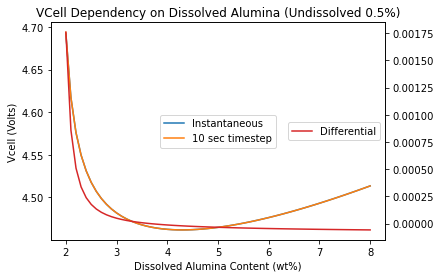

In [34]:
# plot results across the span of dissolved alumina
steplabel = '{0:d} sec timestep'
labelstr = steplabel.format(dt)
fig, dissolved = plt.subplots()
dissolved.plot(x1[:, 0, 0], z1[:, 0, 0], label='Instantaneous')
dissolved.plot(x1dt[:, 0, 0], z1dt[:, 0, 0], label=labelstr)
dissolved.set_xlabel('Dissolved Alumina Content (wt%)')
dissolved.set_ylabel('Vcell (Volts)')
dissolved.set_title("VCell Dependency on Dissolved Alumina (Undissolved 0.5%)")
difcolour = 'tab:red'
disdelta = dissolved.twinx()
disdelta.plot(x1[:, 0, 0], z1delta[:, 0, 0], label='Differential', color = difcolour)
dissolved.legend(loc='center')
disdelta.legend(loc='center right')

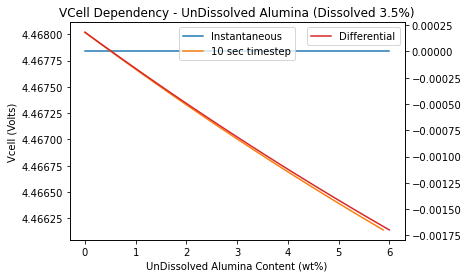

In [35]:
fig, undissolved = plt.subplots()
undissolved.plot(x2[:, 1, 0], z2[:, 0, 0], label='Instantaneous')
undissolved.plot(x2dt[:, 1, 0], z2dt[:, 0, 0], label=labelstr)
undissolved.set_xlabel('UnDissolved Alumina Content (wt%)')
undissolved.set_ylabel('Vcell (Volts)')
undissolved.set_title("VCell Dependency - UnDissolved Alumina (Dissolved 3.5%)")
difcolour = 'tab:red'
undisdelta = undissolved.twinx()
undisdelta.plot(x2[:, 1, 0], z2delta[:, 0, 0], label='Differential', color = difcolour)
undissolved.legend(loc='upper center')
undisdelta.legend(loc='upper right')